# Visualization of raw, processed and generated masks

In [8]:
import nibabel as nib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio 
from nilearn.image import resample_to_img, resample_img
from nilearn import plotting
from scipy.ndimage import center_of_mass, measurements
import pickle
import json
import utils.utils_loading as utils_load
from tqdm import tqdm

In [9]:
# rawdata
# rawdata_dir = "/datadrive_m2/jorge/data/VALDO"
rawdata_dir = "/home/cerebriu/data/datasets/VALDO"

# newdata
# data_dir = "/datadrive_m2/jorge/TEST/VALDO/Data"
data_dir = "/home/cerebriu/data/datasets/VALDO_processed/VALDO_processed/Data"

In [10]:


def plot_mask_on_image(img_data, mask_data, cm_coords, alpha=0.5, title=""):

    # Ensure that both the image and the mask have the same shape
    assert img_data.shape == mask_data.shape, "Image and mask have different shapes!"
    
    # Find the center of mass of the mask
    x, y, z = int(cm_coords[0]), int(cm_coords[1]), int(cm_coords[2])
    
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))
    
    # Plot slices from each dimension at the center of mass
    axes[0].imshow(img_data[x, :, :], cmap='gray')
    axes[0].imshow(mask_data[x, :, :], alpha=0.5, cmap='Reds', interpolation='none')
    axes[0].set_title(f"Sagittal plane at x={x}")

    axes[1].imshow(img_data[:, y, :], cmap='gray')
    axes[1].imshow(mask_data[:, y, :], alpha=0.5, cmap='Reds', interpolation='none')
    axes[1].set_title(f"Coronal plane at y={y}")

    axes[2].imshow(img_data[:, :, z], cmap='gray')
    axes[2].imshow(mask_data[:, :, z], alpha=0.5, cmap='Reds', interpolation='none')
    axes[2].set_title(f"Axial plane at z={z}")

    axes[3].imshow(img_data[:, :, z], cmap='gray')
    axes[3].set_title(f"Original im. Axial plane at z={z}")

    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

### Load data

In [11]:
sub = 102

# rawdata
mask, t2s, t2, t1 = utils_load.read_all_niftis_raw(sub, rawdata_dir)

# newdata
cmb, mri, metadata_raw, metadata_processed = utils_load.read_data_processed(sub, data_dir)

## Visualize rawdata vs. preprocessed

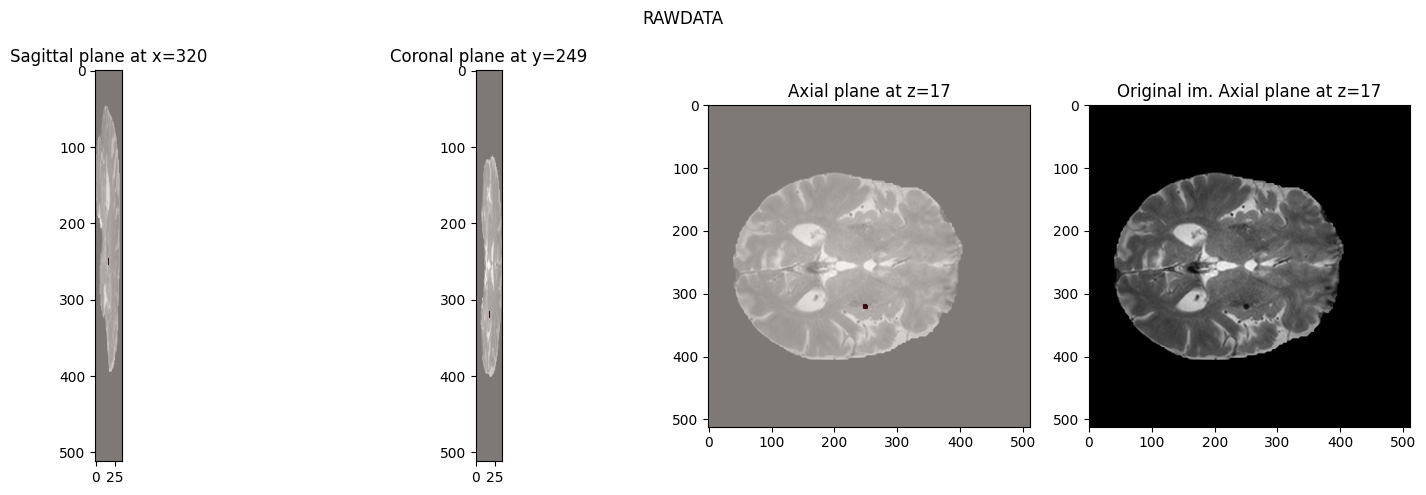

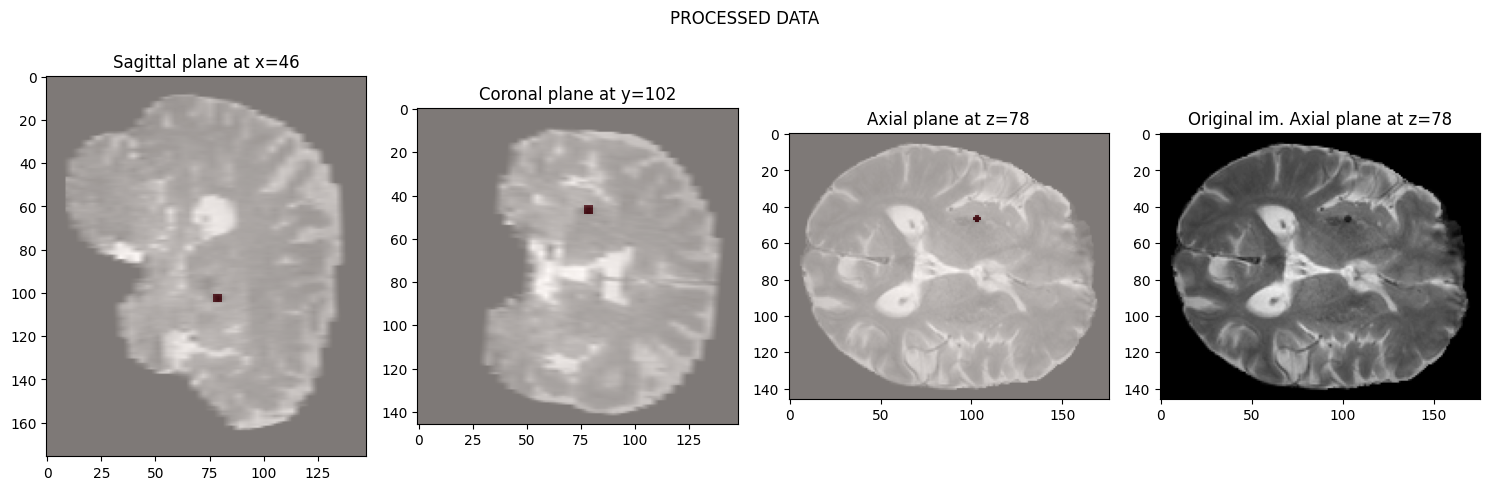

In [12]:
for coords_old, coords_new in zip(metadata_raw['T2S']['centers_of_mass'], metadata_processed['T2S']['centers_of_mass']):
    plot_mask_on_image(t2s.get_fdata()[:, :, :], mask.get_fdata()[:, :, :], cm_coords=coords_old, alpha=0.5, title="RAWDATA")
    plot_mask_on_image(mri.get_fdata()[:, :, :, 0], cmb.get_fdata()[:, :, :], cm_coords=coords_new, alpha=0.5, title="PROCESSED DATA")